### Importación de datos



In [85]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cycler

colors = cycler('color',
                ['#669FEE', '#66EE91', '#9988DD',
                  '#FFBBBB','#EECC55', '#88BB44'])

plt.rc('figure', facecolor='#313233')
plt.rc('axes', facecolor="#313233", edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors,
       labelcolor='gray')
plt.rc('grid', color='474A4A', linestyle='solid')
plt.rc('xtick', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('legend', facecolor="#313233", edgecolor="#313233")
plt.rc("text", color="#FFF")
plt.rc('figure', facecolor='#313233')



url = "base-de-datos-challenge1-latam/tienda_1 .csv"
url2 = "base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

tienda.head()


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#   1. Análisis de facturación



In [3]:
tienda1_ingresos = tienda["Precio"].sum()
tienda2_ingresos = tienda2["Precio"].sum()
tienda3_ingresos = tienda3["Precio"].sum()
tienda4_ingresos = tienda4["Precio"].sum()

print(f"Ingresos Tienda 1: {tienda1_ingresos}")
print(f"Ingresos Tienda 2: {tienda2_ingresos}")
print(f"Ingresos Tienda 3: {tienda3_ingresos}")
print(f"Ingresos Tienda 4: {tienda4_ingresos}")

Ingresos Tienda 1: 1150880400.0
Ingresos Tienda 2: 1116343500.0
Ingresos Tienda 3: 1098019600.0
Ingresos Tienda 4: 1038375700.0


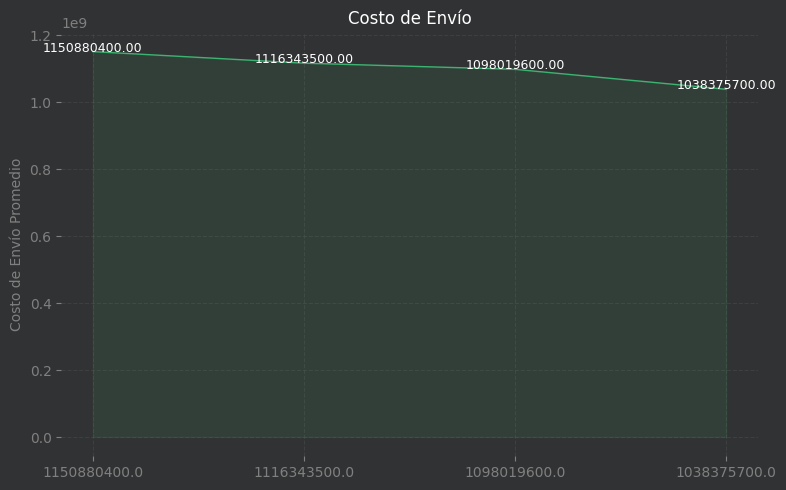

In [82]:
ingresos = [tienda1_ingresos, tienda2_ingresos, tienda3_ingresos, tienda4_ingresos]
tienda = ["Tienda1", "Tienda2", "Tienda3", "Tienda4"]

# Crear gráfico de área
x = range(len(tienda))
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(x, ingresos, color='mediumseagreen', linewidth=1)
ax.fill_between(x, ingresos, color='mediumseagreen', alpha=0.1)

# Etiquetas
for i, val in enumerate(ingresos):
    ax.text(i, val + 0.05, f"{val:.2f}", ha='center', fontsize=9)

# Configurar eje
ax.set_xticks(x)
ax.set_xticklabels(ingresos)
ax.set_ylabel("Costo de Envío Promedio")
ax.set_title("Costo de Envío")
ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


plt.show()

La Tienda 4 tiene los ingresos más bajos, mientras que la Tienda 1 destaca con los más altos

# 2. Ventas por categoría

In [87]:
tienda1_ventas_categoria = tienda.groupby('Categoría del Producto')['Producto'].count().sort_values(ascending=False)
tienda2_ventas_categoria = tienda2.groupby('Categoría del Producto')['Producto'].count().sort_values(ascending=False)
tienda3_ventas_categoria = tienda3.groupby('Categoría del Producto')['Producto'].count().sort_values(ascending=False)
tienda4_ventas_categoria = tienda4.groupby('Categoría del Producto')['Producto'].count().sort_values(ascending=False)

#print("Ventas por categoría - Tienda 1:\n", tienda1_ventas_categoria)
#print("\nVentas por categoría - Tienda 2:\n", tienda2_ventas_categoria)
#print("\nVentas por categoría - Tienda 3:\n", tienda3_ventas_categoria)
print("\nVentas por categoría - Tienda 4:\n", tienda4_ventas_categoria)



Ventas por categoría - Tienda 4:
 Categoría del Producto
Muebles                    480
Electrónicos               451
Juguetes                   338
Deportes y diversión       277
Electrodomésticos          254
Artículos para el hogar    201
Libros                     187
Instrumentos musicales     170
Name: Producto, dtype: int64


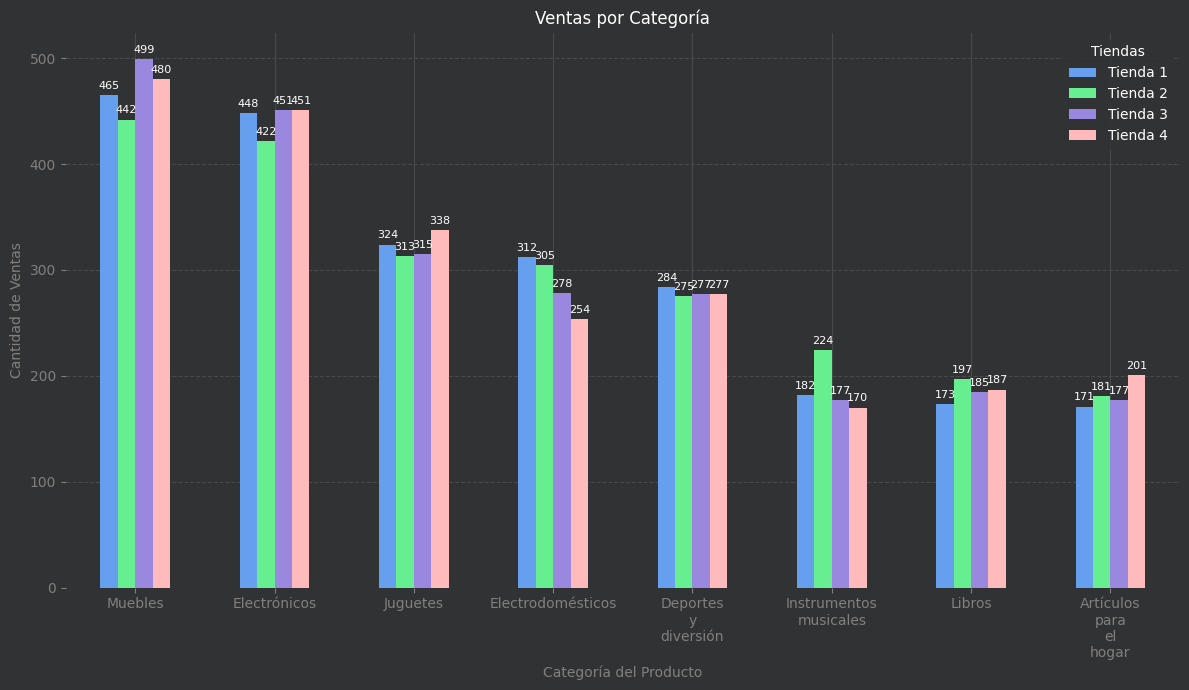

In [57]:
# Combinar en un DataFrame
ventas_comparativas = pd.DataFrame({
    'Tienda 1': tienda1_ventas_categoria,
    'Tienda 2': tienda2_ventas_categoria,
    'Tienda 3': tienda3_ventas_categoria,
    'Tienda 4': tienda4_ventas_categoria
}).fillna(0)

# Calcular el total por categoría y ordenar de mayor a menor
ventas_comparativas['Total'] = ventas_comparativas.sum(axis=1)
ventas_comparativas = ventas_comparativas.sort_values(by='Total', ascending=False)
ventas_comparativas = ventas_comparativas.drop(columns='Total')  # Eliminamos la columna auxiliar

# Reemplazar espacios por saltos de línea en los nombres de las categorías
ventas_comparativas.index = ventas_comparativas.index.str.replace(' ', '\n')

# Crear gráfico de barras agrupadas
ax = ventas_comparativas.plot(kind='bar', figsize=(12, 7))

# Añadir los valores sobre cada barra
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=8)

# Etiquetas y estilo
plt.title('Ventas por Categoría')
plt.xlabel('Categoría del Producto')
plt.ylabel('Cantidad de Ventas')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.legend(title='Tiendas')
plt.tight_layout()
plt.show()

Categproa más vendida en todas las tiendas: Muebles y Electrónicos

Categproa menos vendidas en general: Instrumentos musicales, Libros y Artículos para el hogar

La distribución por categorías no presenta diferencias críticas, aunque Tienda 1 y 2 tienen ventas menores en categorías de menor valor

# 3. Calificación promedio de la tienda


In [5]:
tienda1_calificacion_promedio = tienda["Calificación"].mean()
tienda2_calificacion_promedio = tienda2["Calificación"].mean()
tienda3_calificacion_promedio = tienda3["Calificación"].mean()
tienda4_calificacion_promedio = tienda4["Calificación"].mean()

print(f"Calificación promedio Tienda 1: {tienda1_calificacion_promedio}")
print(f"Calificación promedio Tienda 2: {tienda2_calificacion_promedio}")
print(f"Calificación promedio Tienda 3: {tienda3_calificacion_promedio}")
print(f"Calificación promedio Tienda 4: {tienda4_calificacion_promedio}")

Calificación promedio Tienda 1: 3.976685036032217
Calificación promedio Tienda 2: 4.037303942348453
Calificación promedio Tienda 3: 4.048325561678677
Calificación promedio Tienda 4: 3.9957591178965224


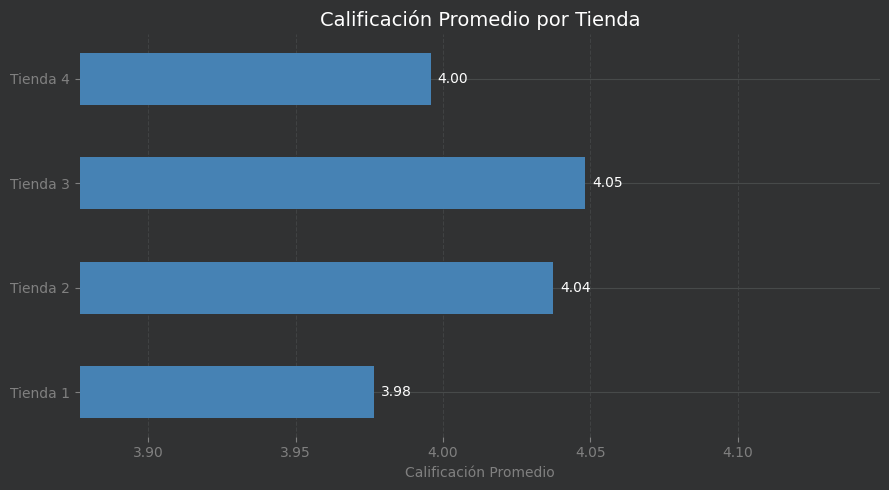

In [70]:
# Datos
nombres_tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
calificaciones = [tienda1_calificacion_promedio, tienda2_calificacion_promedio,
                  tienda3_calificacion_promedio, tienda4_calificacion_promedio]

# Calcular rango ajustado del eje x
min_val = min(calificaciones)
max_val = max(calificaciones)
margen = 0.1  # Margen adicional para mejor visibilidad
x_min = max(0, min_val - margen)
x_max = min(4.5, max_val + margen)

# Crear gráfico horizontal
fig, ax = plt.subplots(figsize=(9, 5))
bars = ax.barh(nombres_tiendas, calificaciones, color='steelblue', height=0.5)

# Etiquetas y estilo
ax.set_title("Calificación Promedio por Tienda", fontsize=14)
ax.set_xlabel("Calificación Promedio")
ax.set_xlim(x_min, x_max)
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Mostrar valores con dos decimales
for bar in bars:
    width = bar.get_width()
    ax.annotate(f'{width:.2f}',
                xy=(width, bar.get_y() + bar.get_height() / 2),
                xytext=(5, 0),
                textcoords="offset points",
                ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

Aunque la Tienda 4 tiene calificaciones aceptables, está por debajo de las tiendas 2 y 3

# 4. Productos más y menos vendidos

In [86]:
tienda1_producto_mas_vendido = tienda['Producto'].value_counts().idxmax()
tienda2_producto_mas_vendido = tienda2['Producto'].value_counts().idxmax()
tienda3_producto_mas_vendido = tienda3['Producto'].value_counts().idxmax()
tienda4_producto_mas_vendido = tienda4['Producto'].value_counts().idxmax()

print(f"\nProducto más vendido Tienda 1: {tienda1_producto_mas_vendido}")
print(f"Producto más vendido Tienda 2: {tienda2_producto_mas_vendido}")
print(f"Producto más vendido Tienda 3: {tienda3_producto_mas_vendido}")
print(f"Producto más vendido Tienda 4: {tienda4_producto_mas_vendido}")


tienda1_producto_menos_vendido = tienda['Producto'].value_counts().idxmin()
tienda2_producto_menos_vendido = tienda2['Producto'].value_counts().idxmin()
tienda3_producto_menos_vendido = tienda3['Producto'].value_counts().idxmin()
tienda4_producto_menos_vendido = tienda4['Producto'].value_counts().idxmin()

print(f"\nProducto menos vendido Tienda 1: {tienda1_producto_menos_vendido}")
print(f"Producto menos vendido Tienda 2: {tienda2_producto_menos_vendido}")
print(f"Producto menos vendido Tienda 3: {tienda3_producto_menos_vendido}")
print(f"Producto menos vendido Tienda 4: {tienda4_producto_menos_vendido}")



Producto más vendido Tienda 1: Microondas
Producto más vendido Tienda 2: Iniciando en programación
Producto más vendido Tienda 3: Kit de bancas
Producto más vendido Tienda 4: Cama box

Producto menos vendido Tienda 1: Auriculares con micrófono
Producto menos vendido Tienda 2: Juego de mesa
Producto menos vendido Tienda 3: Bloques de construcción
Producto menos vendido Tienda 4: Guitarra eléctrica


La Tienda 4 tiene el producto menos vendido con menor atractivo (instrumento musical), lo cual coincide con su categoría más débil.

# 5. Envío promedio por tienda

In [ ]:
tienda1_envio_promedio = tienda["Costo de envío"].mean()
tienda2_envio_promedio = tienda2["Costo de envío"].mean()
tienda3_envio_promedio = tienda3["Costo de envío"].mean()
tienda4_envio_promedio = tienda4["Costo de envío"].mean()

print(f"Costo de envío promedio Tienda 1: {tienda1_envio_promedio}")
print(f"Costo de envío promedio Tienda 2: {tienda2_envio_promedio}")
print(f"Costo de envío promedio Tienda 3: {tienda3_envio_promedio}")
print(f"Costo de envío promedio Tienda 4: {tienda4_envio_promedio}")

Costo de envío promedio Tienda 1: 26018.60958033065
Costo de envío promedio Tienda 2: 25216.235693090293
Costo de envío promedio Tienda 3: 24805.680373039424
Costo de envío promedio Tienda 4: 23459.457167090754


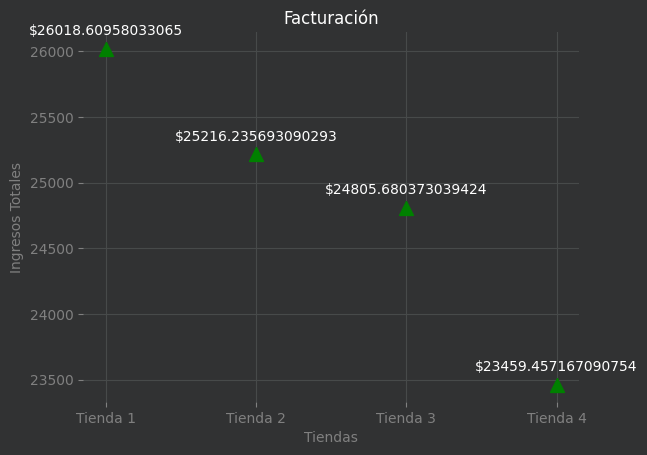

In [83]:
# Datos
costos_promedio = [tienda1_envio_promedio, tienda2_envio_promedio,
                   tienda3_envio_promedio, tienda4_envio_promedio]
nombres_tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]


plt.scatter(nombres_tiendas, costos_promedio, marker='^', color='green', s=100)
plt.xlabel("Tiendas")
plt.ylabel("Ingresos Totales")
plt.title("Facturación")
plt.xticks(nombres_tiendas)
plt.grid(True)

# Añadir las etiquetas de los costos encima de cada punto
for i, costo in enumerate(costos_promedio):
    plt.annotate(f'${costo}',
                 (nombres_tiendas[i], costo),
                 textcoords="offset points",
                 xytext=(0, 10),
                 ha='center')

plt.show()

La Tienda 4 es la más eficiente en logística, lo cual es una fortaleza operativa a considerar

# -INFORME 

Conclusión y Recomendación
Después de considerar todos los factores clave, se recomienda vender la Tienda 4. Esta decisión se basa en los siguientes puntos:

Menor ingreso total entre las cuatro tiendas.

Calificación de clientes inferior respecto a las tiendas 2 y 3.

Aunque tiene un costo de envío menor, este beneficio no compensa sus debilidades en ingreso y percepción del cliente.

Sus productos y categorías menos vendidos pertenecen a segmentos con baja rotación y demanda limitada.

Por lo tanto, vender la Tienda 4 representaría la menor pérdida de valor y permitiría al Sr. Juan concentrar sus recursos en un nuevo negocio .